##Polina Turishcheva  
##STDS&R - Assigment 2   
##April 2022  

##Task 1  
$Y$ - random variable, number of samples with Giardia. $\theta$ is given. For a single sample $X$ it is a Bernoulli trial because either there is cyst in a sample or not, $\theta$ is the probability that a probe has a cyst. In our case, $Y$ is a random variable for a number of samples with cysts, so $Y = X_1 + X_2 ... X_n$, which is by definition Binomial distribution. Therefore, distribution $(X | \theta)$ ~ Binomial(n, $\theta$) $→$ $P(X = x | \theta, n) = C^x_n \theta^x (1 - \theta)^{n - x}$. 

##Task 2  
Given $E[\theta] = 0.2$ and $\sqrt(Var[\theta])= 0.16$. $Y$ ~ $Beta(\alpha, \beta)$.    
Solution:   
$E[\theta] = \frac{\alpha}{\alpha + \beta}=0.2$ $→$ $0.8α = 0.2 \beta$  $→$ $4α = \beta$     

$Var[\theta]= \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}=\frac{4}{25(5α + 1)}=0.0256$ $→$ $3.2α =3.36$ $→$ $α =1.05 ≈ 1$ and $\beta =4.20 ≈ 4$ 

##Task 3 
  

Posterior = $\frac{\text{Likelihood} * \text{Prior}}{\text{Marginal likelihood}}$   
In our case, the prior is given from task 2: prior ~ $Beta(1, 4)$. Probability distribution function for $Beta(α, β)$ distribution is $f(\theta) = \frac{Г(α+ β)}{Г(α)Г(β)} \theta^{α - 1}(1-\theta)^{β - 1}$   
Likelihood is by definition $p(x | \theta, n) = C^x_n \theta^x (1 - \theta)^{n - x}$ (as defined in Task 1)   
Marginal likelihood is probability that $x$ takes a specific value with all possible values of $\theta$, so, in fact, it is a normallization constant. By definition marginal likelihood is $p(X=x|n) = \int^1_0 p(x=17 | n=116, \theta) p(\theta) d \theta = \int^1_0 p(x=17 | n=116, \theta) d \theta$ because in our case $\theta$ is ~ $Uniform(0,1)$. $→$ $ p(X=x|n) = \int^1_0 C^x_n \theta^x (1 - \theta)^{n - x} d \theta$. 
$$Posterior(\theta | x, n) = \frac{\text{Likelihood} * \text{Prior}}{\text{Marginal likelihood}} = \frac{C^{x}_{n} \theta^{x} (1 - \theta)^{n - x}  \theta^{α} (1 - \theta)^{\beta - 1}}{C^{x}_{n} \int^1_0 \theta^{x} (1 - \theta)^{n-x} d \theta B(α,\beta)} = \frac{ \theta^{x + α - 1} (1 - \theta)^{n - x + \beta -1}  }{ B(x + 1,n - x + 1) B(α,\beta)} $$    
where $B(x, y) = \int_0^1 t^{(x - 1)} (1-t)^{(y-1)}dt = \frac{Г(x)Г(y)}{Г(x + y)}$ is the beta function. As $x$ and $n$ are constants and $α$ and $\beta$ are also constants defined by $x$ and $n$, and complete $B(α, \beta)$ is a constant as well, hence, $B(x + 1,n - x + 1) * B(α,\beta) = const$.  
Hence, Posterior$(\theta | x, n) = \frac{ \theta^{x + α - 1} (1 - \theta)^{n - x + \beta -1}  }{const}$. Again, as $x$ and $n$ are constants, I may use $α' = x + α$ and $\beta'= n - x + \beta$ rewrite it as Posterior$(\theta | x, n) = \frac{ \theta^{α' - 1} (1 - \theta)^{ \beta' -1}  }{const}$ and we may see that our Posterior$(\theta | x, n)$ ~ $Beta(α', \beta') = Beta(x + α, n - x + \beta)$


In our case, $x = 17$ and $n=116$ $→$ Posterior ~ $Beta(x + α, n - x + \beta) = Beta(18, 103)$  

$E[Beta(18, 103)] = \frac{α}{α+β}= \frac{18}{18+103} = 0.149$   
$Std[Beta(18, 103)] = \sqrt{\frac{αβ}{(α+β)^2(α+β+1)}}=\sqrt{\frac{18*103}{121^2 *122}} = 0.032$

In [32]:
import numpy as np
from scipy.special import comb, beta
from scipy import stats
import matplotlib.pyplot as plt

In [33]:
print(18 / 121)
print(np.sqrt(18 * 103 / 122) / 121)

0.1487603305785124
0.03221733249847173


##Task 4

From task 3 we know that posterior is $p(\theta|X)$ ~ $Beta(18, 103)$ and likelihood is $p(X|\theta)$ ~ $C^k_n \theta^{17} (1 - \theta)^{99}$. To make the likelihood normalized we should make it to sum to one, hence, to divide to the normalizing constant, which is the value of the integral for all possible values of $\theta$. Therefore, the normalzing constant is $c = \int^1_0 C^k_n \theta^{17} (1 - \theta)^{99} d \theta = \frac{1}{117}$

In [34]:
x = np.linspace(0, 1, 1000)
prior = stats.beta(1, 4).pdf(x)
posterior = stats.beta(18, 103).pdf(x)
norm_constant =  1 / 117
normalized = stats.binom.pmf(17, 116, x) / norm_constant

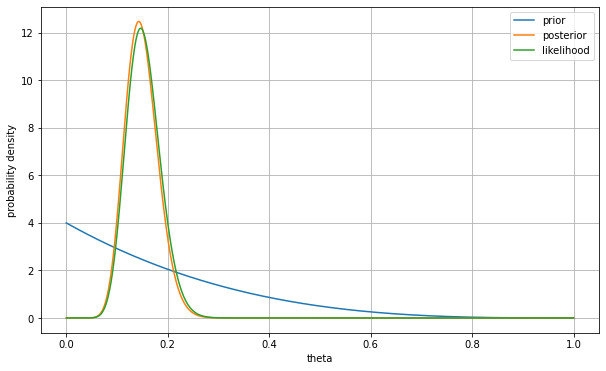

In [41]:
plt.figure(figsize=(10,6))
plt.plot(x, prior, label='prior')
plt.plot(x, posterior, label='posterior')
plt.plot(x, normalized, label='likelihood')
plt.legend()
plt.xlabel('theta')
plt.ylabel('probability density')
plt.grid(True)

##Task 5  
In task 3, I showed that posterior probability for $P(\theta| x = 17)$ ~ $Beta(18, 103)$. As $P(X < x) = cdf_X(x) = \int_{-∞}^x pdf_X dx$, hence, $P(\theta < 0.1| x = 17) = \frac{1}{B(18,103)}\int_0^{0.1}x^{17}(1-x)^{102}dx$, where $B(18,103) = \int_0^1x^{17}(1-x)^{102}dx$. 

$x = 17$ here influenced the values of $\alpha$ and $\beta$ for the $Beta(α, \beta)$ distribution. 


In [36]:
stats.beta(18, 103).cdf(0.1)

0.05309437699304309

##Task 6
To find a confidence interval with percentage $p$ we do the following steps:
1. $α = 1 - p$, in our case $α = 1 - 0.95 = 0.05$
2. The left border of the interval :  $F_{θ|X}(θ_{α/2}) = α/2$. In our case, $F_{θ|X}(θ_{0.025}) = 0.025$, where $F$ is the cummulative distribution function for beta distribution.
3. The right border of the interval :  $F_{θ|X}(θ_{1 - α/2}) = 1 - α/2$. In our case, $F_{θ|X}(θ_{0.975}) = 0.975$

Luckily, python has those calculation steps already implemented:


In [37]:
stats.beta(18, 103).interval(alpha=0.95)

(0.09138957252822995, 0.21710689824337648)

##Task 7   
$n^* = 50$. Find posterior predictive probability $x^* = 5$ ($x$ is the probes with Giardia cysts).

Solution:  
By definition, posterior predictive distribution is $p(x^*|x) = ∫_{\theta} p(x^* |x, \theta) p(\theta|x) d\theta$. Hence, in our case $\theta \in [0,1]$ as it is a probability of success from the binomial distribution, $p(x^* |x, \theta) = C^{x^*}_{n^*} \theta^{x^*} (1-\theta)^{n^* - x^*}$, and $p(\theta|x) = f(\theta|x)$.   
Previously we found out that $f(\theta|x) ≈ Beta(18,103) = Beta(α',β') = Beta(α + x, β + n - x)$, where $n$ is the number of samples and $x$ is the number of success cases. Probability distributiion function for $Beta(α', β')$ distribution is $$f(\theta) = \frac{Г(α' + β')}{Г(α')Г(β')} \theta^{α' - 1}(1-\theta)^{β' - 1}$$ Substituting $α' = α + x$ and $β'= β + n - x$ we get $$f(\theta) = \frac{Г(α + β + n)}{Г(α + x)Г(β +n - x)} \theta^{α + x - 1}(1-\theta)^{β + n - x - 1}$$
Therefore, the general formula is $$p(x^*|x) = ∫_0^1 C^{x^*}_{n^*} \theta^{x^*} (1-\theta)^{n^* - x^*} \frac{Г(α + β + n)}{Г(α + x)Г(β +n - x)} \theta^{α + x - 1}(1-\theta)^{β + n - x - 1} d\theta$$
To make it a bit simpler

$$p(x^*|x) = C^{x^*}_{n^*} \frac{Г(α + β + n)}{Г(α + x)Г(β +n - x)}  ∫_0^1  \theta^{x^* + α + x - 1} (1-\theta)^{n^* - x^* + β + n - x - 1} d\theta = $$
$$= C^{x^*}_{n^*} \frac{Г(α + β + n)}{Г(α + x)Г(β +n - x)} B(x^* + α + x, n^* - x^* + β + n - x)$$ 
where $B(x, y) = \int_0^1 t^{(x - 1)} (1-t)^{(y-1)}dt = \frac{Г(x)Г(y)}{Г(x + y)}$ is the beta function.   

In our case, $α = 1, β=4, n^* = 50, n = 116, x= 17, x^*=5 →$
$p(x^*|x) = C^{5}_{50} \frac{Г(121)}{Г(18)Г(103)} B(23, 148) =  C^{5}_{50} \frac{B(23, 148)}{B(18, 103)}$



In [38]:
beta(23,148) * comb(50, 5) / beta(18,103)

0.11087168880461985

##Task 8    

$H_0 : \theta ≥ 0.2$   
$H_1: \theta<0.2$   


Solution:  
I used binomial test:  
$ P (x \leq 17|\theta = 0.2) = \sum_{i = 0}^{17} C^{i}_{n}\theta^i (1-\theta)^{n-i}$

In [39]:
res = 0
n = 116
theta = 0.2
for i in range(18):
  res += comb(n, i) * (theta ** i) * ((1 - theta) ** (n - i))
res

0.08947619410317205

$ P (x \leq 17|\theta = 0.2) ≈ 0.0895$. The classical significance level is 5%, hence, I also use it. As 0.0895 is more than $0.05$ I cannot reject the null hypothesis here.

##Task 9  
In Bayesian manner:  
$H_0 : \theta ≥ 0.2$   
$H_1: \theta<0.2$  

Solution:  
In Bayesian manner, the posterior probability of $\theta$ to be above 0.2.  
$ P (\theta \geq 0.2|x = 17) =  1 - P (\theta \leq 0.2|x = 17)  = 1 - \int^{0.2}_0 \theta^{α -1} (1-\theta)^{β -1 } d\theta = 1 - \int^{0.2}_0 \theta^{17} (1- \theta )^{102 }d\theta$, where again $P (\theta \leq 0.2|x = 17)$ is in fact counted from the beta distribution cdf.

In [40]:
1 - stats.beta(18, 103).cdf(0.2)

0.06472685723749172

$P (\theta \geq 0.2|x = 17) = 0.0647$ which is again more than $0.05$, hence, even while with Bayesian approach the probility that $\theta \geq 0.2$ is less, I still cannot reject the null hypothesis.